In [3]:
import matplotlib.pyplot as plt
import torch
import torchvision.transforms.functional as functional

import data
import models

model = models.RotationalSphericalVariationalAutoencoder.load_from_checkpoint(
    "spherinator/euj7yhpr/checkpoints/epoch=34-step=16205.ckpt")

data_module = data.IllustrisSdssDataModule(
    data_directories=["/home/doserbd/data/machine-learning/SKIRT_synthetic_images/TNG50/sdss/snapnum_095/data/"],
    num_workers=1, batch_size=1)
data_module.setup("fit")
data_loader = data_module.train_dataloader()

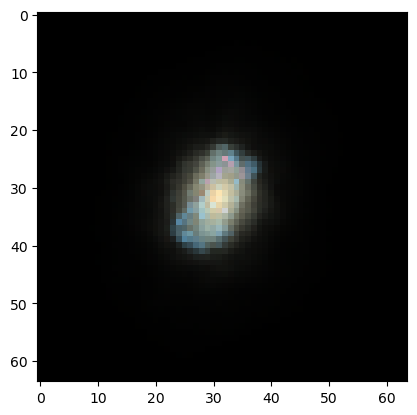

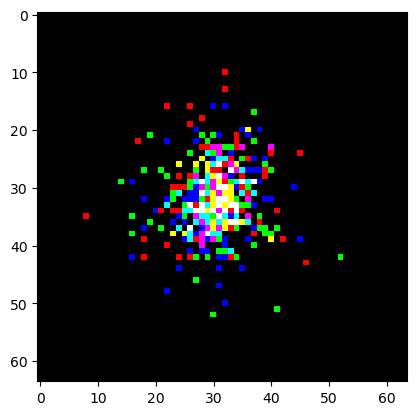

/home/doserbd/anaconda3/envs/spherinator/lib/python3.10/site-packages/torch/distributions/distribution.py:51: UserWarning: <class 'hyperspherical_vae.distributions.hyperspherical_uniform.HypersphericalUniform'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


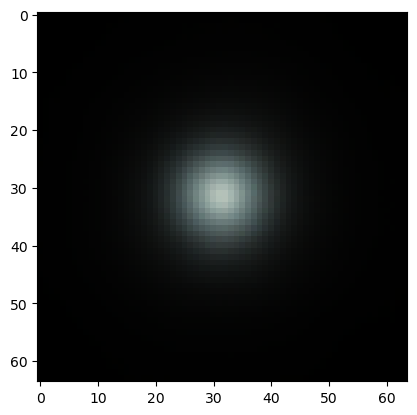

In [5]:
for batch in data_loader:
    image = batch["image"]
    image = image.to(model.device)
    image = functional.rotate(image, 0.0, expand=False)
    image = functional.center_crop(image, [256,256])
    input = functional.resize(image, [64,64], antialias=False)

    plt.imshow(input.cpu().numpy().squeeze().T)
    plt.show()
    
    # dynamic binarization
    input = (input > torch.distributions.Uniform(torch.tensor(0.0, device=model.device),
        torch.tensor(1.0, device=model.device)).sample(input.shape)).float()

    plt.imshow(input.cpu().numpy().squeeze().T)
    plt.show()

    _, (q_z, p_z), _, recon = model(input)

    recon_image = torch.sigmoid(recon)

    plt.imshow(recon_image.cpu().detach().numpy().squeeze().T)
    plt.show()
    
    break